<a href="https://colab.research.google.com/github/koking0/MLLM-Algorithm-Application-Finetuning/blob/main/4-DeepGenerateModel/4.4-StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from diffusers import StableDiffusionPipeline
import torch as th

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=th.float16)
pipe = pipe.to("cuda")
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片
image = pipe(prompt=prompt).images[0]
image.save("astronaut_rides_horse.png")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

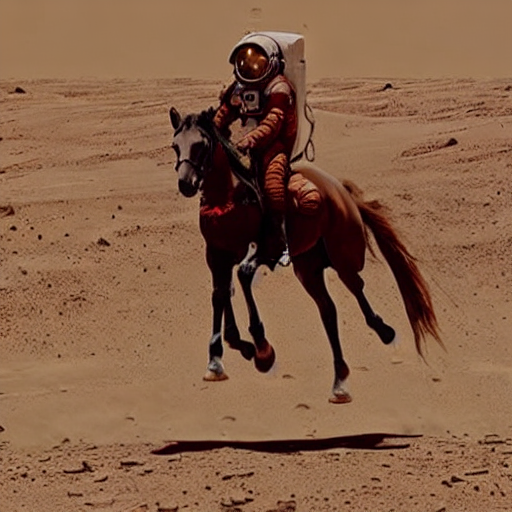

In [2]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

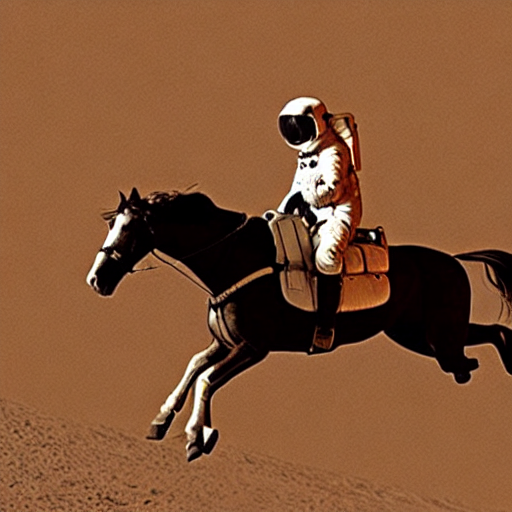

In [3]:
generator = th.Generator("cuda").manual_seed(1)
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片
image = pipe(prompt=prompt, generator=generator).images[0]
image

  0%|          | 0/70 [00:00<?, ?it/s]

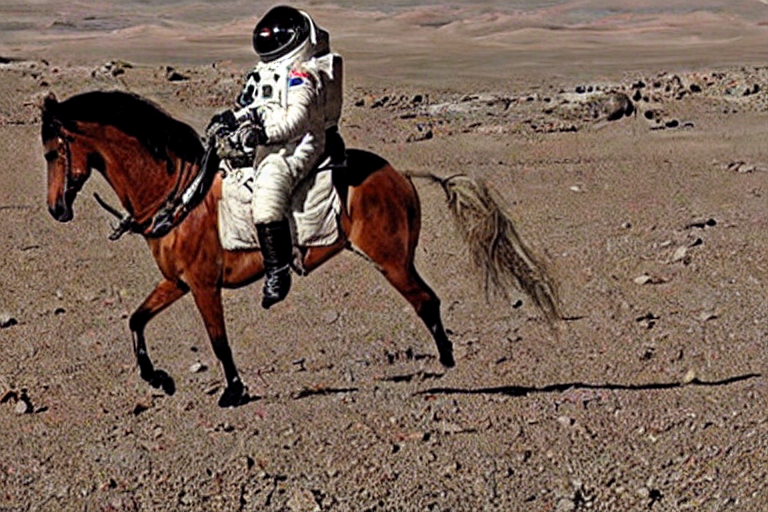

In [4]:
image = pipe(prompt=prompt, generator=generator, height=512, width=768, num_inference_steps=70, guidance_rescale=2).images[0]
image

In [9]:
from transformers import CLIPTextModel, CLIPTokenizer
from transformers import  CLIPFeatureExtractor
from diffusers import AutoencoderKL, UNet2DConditionModel
from diffusers import LMSDiscreteScheduler
from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker


# 单独家在CLIP模型和tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")
# 单独加载U-Net模型
unet = UNet2DConditionModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="unet")
# 单独加载VAE模型
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae")
# 单独加载调度算法
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
safety_checker = StableDiffusionSafetyChecker.from_pretrained("CompVis/stable-diffusion-safety-checker")
feature_extractor = CLIPFeatureExtractor()

pipe = StableDiffusionPipeline(
    vae=vae,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    unet=unet,
    scheduler=scheduler,
    safety_checker=safety_checker,
    feature_extractor=feature_extractor
)
pipe = pipe.to("cuda")
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片
image = pipe(prompt=prompt).images[0]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:221: FutureWarning: The configuration file of this scheduler: LMSDiscreteScheduler {
  "_class_name": "LMSDiscreteScheduler",
  "_diffusers_version": "0.32.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "steps_offset": 0,
  "timestep_spacing": "linspace",
  "trained_betas": null,
  "use_beta_sigmas": false,
  "use_exponential_sigmas": false,
  "use_karras_sigmas": false
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  deprecate("steps_offset!=1", "1.0.0", deprecation_messag

  0%|          | 0/50 [00:00<?, ?it/s]

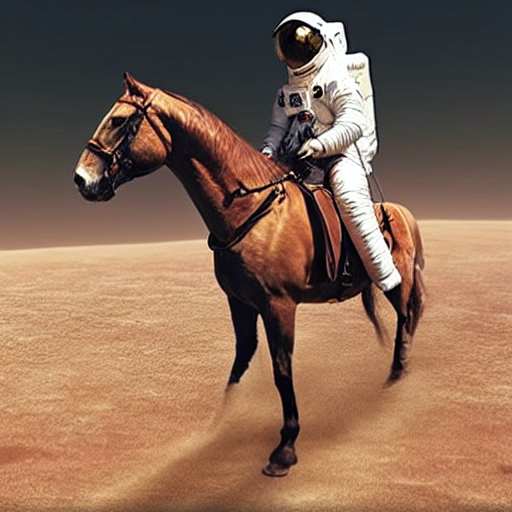

In [10]:
image

In [11]:
import torch as th
from diffusers import StableDiffusionPipeline

In [12]:
model_id = "runwayml/stable-diffusion-v1-5"
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片

In [13]:
th.cuda.empty_cache()
pre_memory = th.cuda.memory_allocated() / 1e9
pipe1 = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
image1 = pipe1(prompt=prompt).images[0]
post_memory = th.cuda.memory_allocated() / 1e9
print(f"32位浮点数加载模型的显存占用: {(post_memory - pre_memory):.5f} GB")

th.cuda.empty_cache()
pre_memory = th.cuda.memory_allocated() / 1e9
pipe2 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=th.float16).to("cuda")
image2 = pipe2(prompt=prompt).images[0]
post_memory = th.cuda.memory_allocated() / 1e9
print(f"16位浮点数加载模型的显存占用: {(post_memory - pre_memory):.5f} GB")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

32位浮点数加载模型的显存占用: 5.51070 GB


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

16位浮点数加载模型的显存占用: 2.77336 GB
